In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fft import fft, fftfreq

path = './EMG_Datasets/EMG_Datasets.csv'
dataset = pd.read_csv(path)
contractedFilterOutput = './Output_Files/contractFilterOut.csv'
relaxedFilterOutput = './Output_Files/relaxedFilterOut.csv'

# y = np.sin(2*np.pi*100*x) # frequency is 100 Hz
relaxedData= dataset['EMG_Relaxed (mV)'].to_numpy()
contractData = dataset['EMG_Contracted (mV)'].to_numpy()
time = dataset['Time (s)'].to_numpy()
x = np.linspace(0,10,len(contractData)) # fs is 10000/10 = 1000

order = 8
fs = 1000
frequencies_bandpass = [0.1, 450]
frequencies_stop = [57, 63]

sos_bandpass = signal.butter(order, frequencies_bandpass, btype='pass', fs=fs, output='sos')
sos_stop = signal.butter(order, frequencies_stop, btype='stop', fs=fs, output='sos')

datasets = [contractData, relaxedData]
filtered_data = []

for data in datasets:
    databpf = signal.sosfilt(sos_bandpass, data)
    databpf_filtered = signal.sosfilt(sos_stop, databpf)
    filtered_data.append(databpf_filtered)

databpfOne, databpfThree = filtered_data

# Get the fft fo both unfiltered and filtered
N = len(contractData)
yf = (2/N) * np.abs(fft(contractData)) 
databpf_f = (2/N) * np.abs(fft(databpfOne))

# Truncate fft to RHS only
xf = fftfreq(N,1/1000) # ts=1/fs is the 0.1
yf = yf[0:N//2]
databpf_f = databpf_f[0:N//2]

yfr = (2/N) * np.abs(fft(relaxedData)) 
databpf_fOne = (2/N) * np.abs(fft(databpfThree))
yfr = yfr[0:N//2]
databpf_fOne = databpf_fOne[0:N//2]

xf = xf[0:N//2]

data_contracted = list(zip(xf, databpf_f))
data_relaxed = list(zip(xf, databpf_fOne))

with open(contractedFilterOutput, "w") as file:
    file.write("Time (s),Filtered EMG Contracted\n")
    for row in data_contracted:
        file.write(f"{row[0]},{row[1]}\n")

with open(relaxedFilterOutput, "w") as file:
    file.write("Time (s),Filtered EMG Relaxed\n")
    for row in data_relaxed:
        file.write(f"{row[0]},{row[1]}\n")

def check_termination():
    termination_word = "exit" 
    user_input = input("Type 'exit' to terminate the program: ")
    return user_input.lower() == termination_word.lower()

print(len(xf))
print(len(yf))
print(len(databpf_f))
print(len(databpf_fOne))

# plt.pause(0.1) # so that the program doesnt hold/freeze with plt.show(), can continue check_termination

# while True:
#     if check_termination():
#         break

# plt.close()


5120
5120
5120
5120


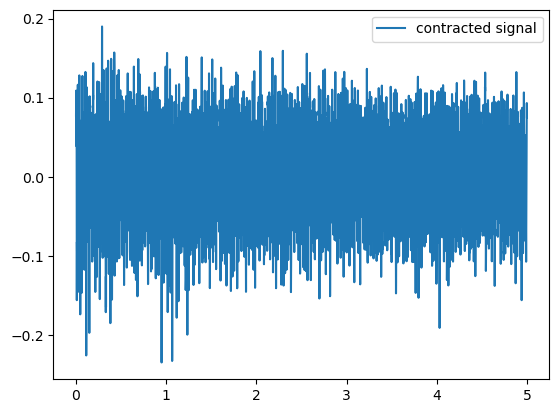

In [51]:
# plt.subplot(1,4,1)
plt.plot(time,contractData,label='contracted signal')
plt.legend()
plt.show()

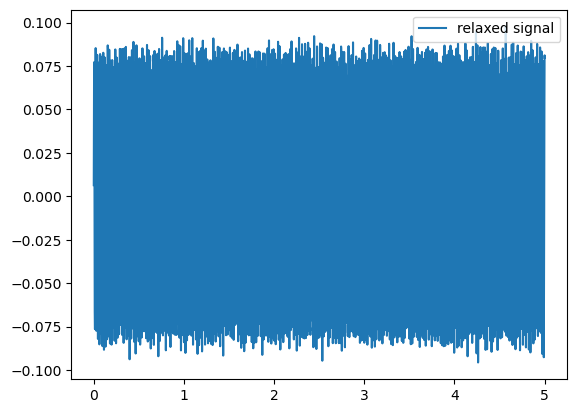

In [52]:
# plt.subplot(1,4,2)
plt.plot(time, relaxedData,label='relaxed signal')
plt.legend()
plt.show()


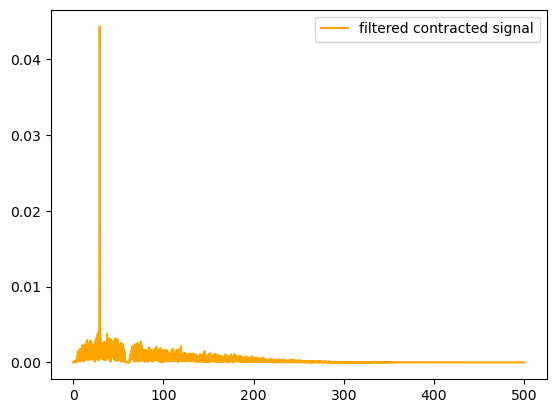

In [53]:
# plt.subplot(1,4,3)
plt.plot(xf,databpf_f,label='filtered contracted signal', color = 'orange')
# plt.xlim([0,450])
plt.legend()
plt.show()

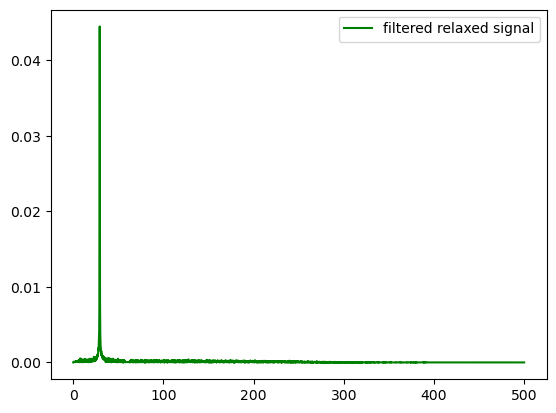

In [54]:
# plt.subplot(1,4,4)
plt.plot(xf,databpf_fOne,label='filtered relaxed signal', color = 'green')
plt.legend()
plt.show()


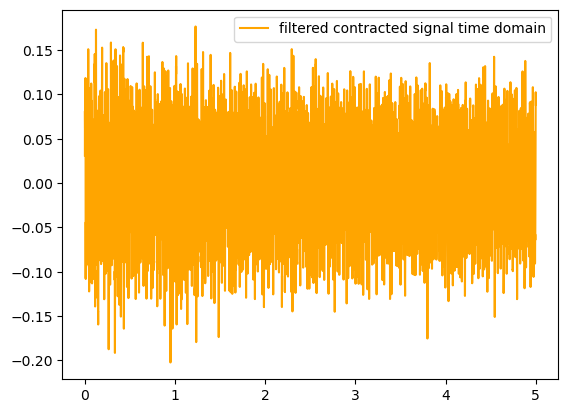

In [55]:
plt.plot(time,databpfOne,label='filtered contracted signal time domain', color = 'orange')
plt.legend()
plt.show()

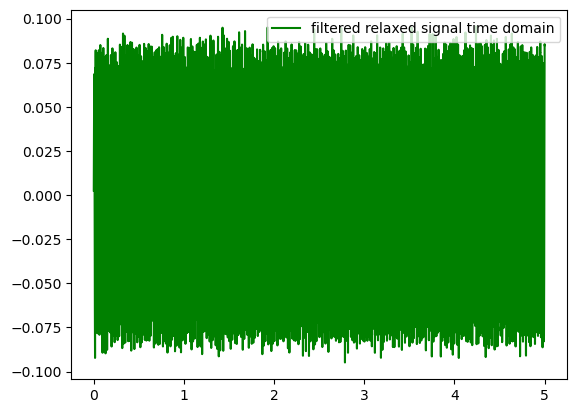

In [56]:
plt.plot(time,databpfThree,label='filtered relaxed signal time domain', color = 'green')
plt.legend()
plt.show()

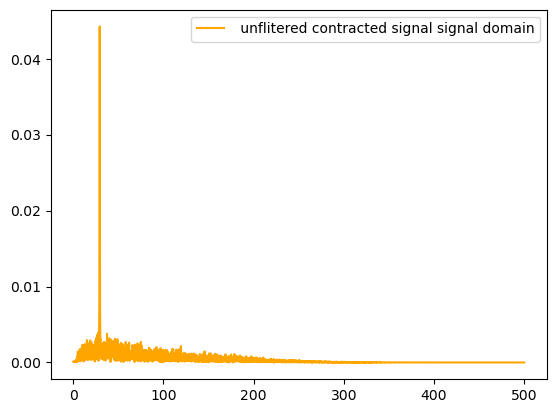

In [57]:
plt.plot(xf ,yf,label=' unflitered contracted signal signal domain', color = 'orange')
plt.legend()
plt.show()

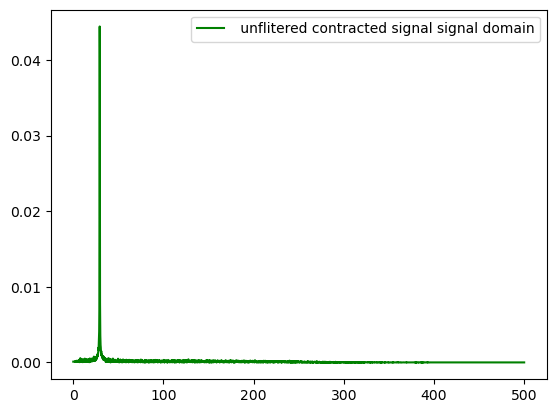

In [58]:
plt.plot(xf ,yfr,label=' unflitered contracted signal signal domain', color = 'green')
plt.legend()
plt.show()

10240
10240
10240
0
RMS of Contracted Signal:  0.0751583884666832
RMS of relaxed Signal:  0.0796910401444701
RMS of filtered Contracted Signal:  0.06409753078859377
RMS of filtered relaxed Signal:  0.056782257414729455


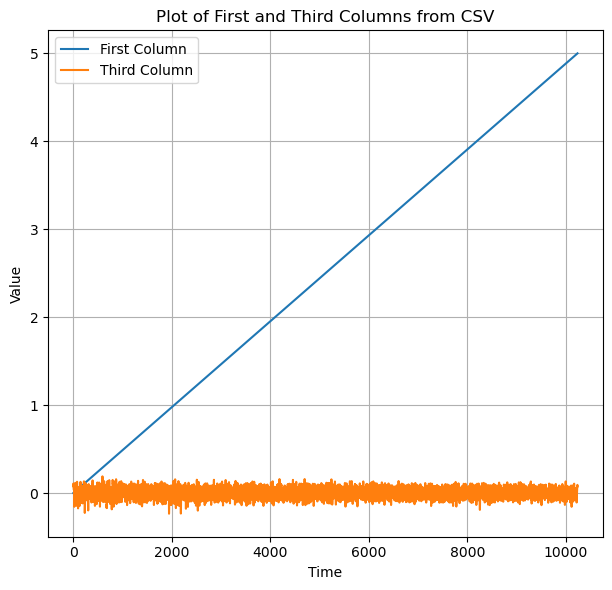

In [75]:
relaxedFilterPath = './Output_Files/relaxedFilterOut.csv'
contractedFilterPath = './Output_Files/contractFilterOut.csv'

dataset = pd.read_csv(path)
filteredContractedDataSet = pd.read_csv(contractedFilterPath)
filteredRelaxedDataSet = pd.read_csv(relaxedFilterPath)

relaxedFilePath = './Output_Files/relaxedRMS.csv'
contractFilePath = './Output_Files/contractRMS.csv'

x = []
xFilter = []
yRelaxed = []
yContract = []
yFilterContract = []

length = len(dataset['Time (s)'])
halfTime = time[0:length//2]

def RMS(emgData):
    return np.sqrt((np.mean((emgData ** 2))))

for _, row in dataset.iterrows():
    time = (row['Time (s)'])
    relaxedEMG = row['EMG_Relaxed (mV)']
    contractEMG = row['EMG_Contracted (mV)']
    relaxedRMS = RMS(relaxedEMG)
    contractedRMS = RMS(contractEMG)

    x.append(time)
    yContract.append(contractedRMS)
    yRelaxed.append(relaxedRMS)

# CHECK AND UPDATE THISSSSSS 
contractFilterRMS = RMS(databpfOne)
relaxedFilterRMS = RMS(databpfThree)

# for _, row in filteredContractedDataSet.iterrows():
#     # timeT = (row['Time (s)'])
#     # timeT = timeT[0:length//2]
#     # contractFilterEMG = row['Filtered EMG Contracted']
#     contractFilterRMS = RMS(yf)

#     # xFilter.append(timeT)
#     yFilterContract.append(contractFilterRMS)

with open(contractFilePath, "w") as file:
    file.write("Time (s),RMS EMG Contracted\n")
    for time, contractedRMS in zip(x, yContract):
        file.write(f"{time},{contractedRMS}\n")

with open(relaxedFilePath, "w") as file:
    file.write("Time (s),RMS EMG Relaxed\n")
    for time, relaxedRMS in zip(x, yRelaxed):
        file.write(f"{time},{relaxedRMS}\n")

def check_termination():
    termination_word = "close" 
    user_input = input("Type 'close' to terminate the program: ")
    return user_input.lower() == termination_word.lower()

print(len(x))
print(len(yRelaxed))
print(len(yContract))
print(len(yFilterContract))


plt.figure(figsize=(18, 6))  # Adjust the figure size as per your requirement


# plotting the relaxed EMG

print("RMS of Contracted Signal: ", contractedRMS)
print("RMS of relaxed Signal: ", relaxedRMS)
print("RMS of filtered Contracted Signal: ", contractFilterRMS)
print("RMS of filtered relaxed Signal: ", relaxedFilterRMS)


# plt.subplot(1,3,1)
# plt.plot(x, yRelaxed, label='Relaxed EMG RMS')
# plt.xlabel('Time (s)')
# plt.ylabel('Relaxed EMG')
# plt.title('Relaxed EMG RMS Processed')

# # plotting the contracted EMG
# plt.subplot(1,3,2)
# plt.plot(x, yContract, label = 'Contracted EMG RMS', color = 'orange')
# plt.xlabel('Time (s)')
# plt.ylabel('Contracted EMG')
# plt.title('Contracted EMG RMS Processed')

first_column = dataset.iloc[:, 0]
third_column = dataset.iloc[:, 2]

# Plot the data
plt.subplot(1,3,3)
plt.plot(first_column, label='First Column')
plt.plot(third_column, label='Third Column')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Plot of First and Third Columns from CSV')
plt.grid(True)

plt.tight_layout()  # To prevent overlapping of subplots
plt.show()


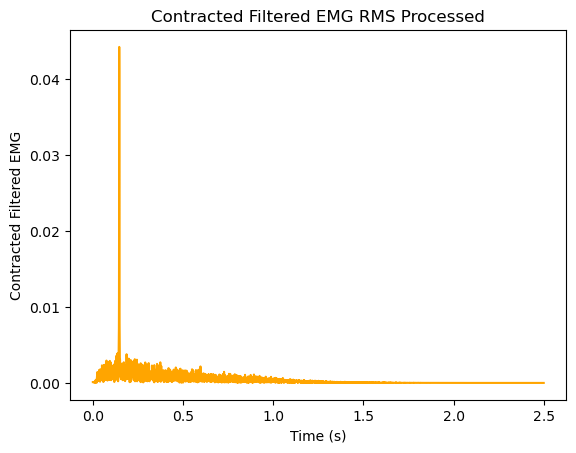

In [47]:
plt.plot(halfTime, yf, label = 'Contracted Filtered EMG RMS', color = 'orange')
plt.xlabel('Time (s)')
plt.ylabel('Contracted Filtered EMG')
plt.title('Contracted Filtered EMG RMS Processed')
plt.show()
